In [2]:
#libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [3]:
#import data
path = "../data/"
train = pd.read_json(path + "train.json")
test = pd.read_json(path + "test.json") 

In [4]:
#view data
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
#how many recipes? 
print(len(train))
print(len(test))

#80/20 split
9944/(39774 + 9944)

39774
9944


0.20000804537592018

In [6]:
#what are the most frequent cuisines?
cuisines = pd.DataFrame(train['cuisine'].value_counts()*100/len(train))

#clean up cuisines
cuisines.index = [z.capitalize().split('_')[0] for z in list(cuisines.index)] 

#format percentages
#cuisines['cuisine'] = ["{0:.1f}%".format(x * 100) for x in cuisines['cuisine']]

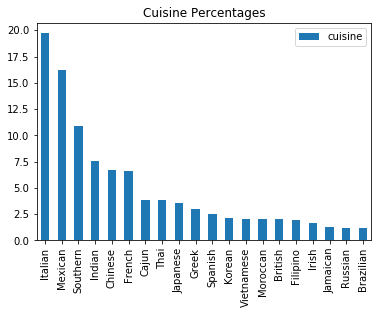

In [7]:
#plot
cuisines.plot(kind='bar')
plt.title('Cuisine Percentages')
plt.show()

In [8]:
#80% misclass rate with no model - classify ingredients to the largest class
100 - cuisines['cuisine'][0]

80.293659174334991

In [9]:
#95% misclass rate with no model - classify ingredients randomly
100 - 100/len(cuisines.index)

95.0

In [10]:
#instantiate
stemmer = WordNetLemmatizer()

# clean the ingredients
def clean_recipe(recipe):
    # lowercase
    recipe = [ str.lower(i) for i in recipe ]

    # Remove some special characters
    # http://stackoverflow.com/a/27086669/670873
    def replacing(i):
        i = i.replace('&', '').replace('(', '').replace(')','')
        i = i.replace('\'', '').replace('\\', '').replace(',','')
        i = i.replace('.', '').replace('%', '').replace('/','')
        i = i.replace('"', '')
        
        return i
    
    # Replacing characters
    recipe = [ replacing(i) for i in recipe ]
    
    # Remove digits
    recipe = [ i for i in recipe if not i.isdigit() ]
    
    # Stem ingredients
    recipe = [ stemmer.lemmatize(i) for i in recipe ]
    
    return recipe

In [11]:
# The number of times each ingredient is used is stored in the 'sumbags' dictionary
bags_of_words = [ Counter(clean_recipe(recipe)) for recipe in train.ingredients ]
sumbags = sum(bags_of_words, Counter())

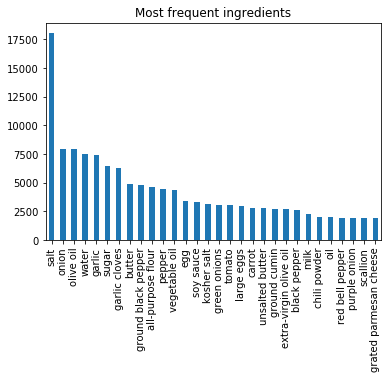

In [22]:
# what ingredients are used most frequently? 
top10 = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:30]
top10.plot(kind='bar')
plt.title('Most frequent ingredients')
plt.show()

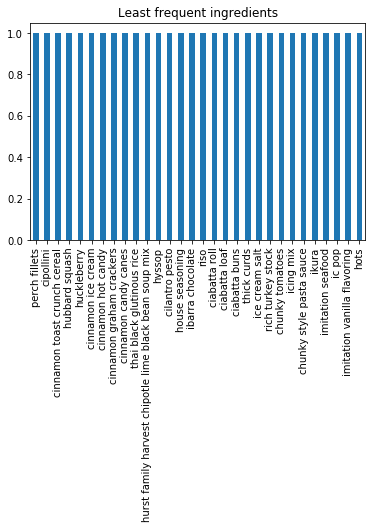

In [35]:
# what ingredients are used least frequently? 
bot30 = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort_values(ascending=True, inplace=False)[:30]
bot30.plot(kind='bar')
plt.title('Least frequent ingredients')
plt.show()